# Project 7

__Importing Necessary Packages:__

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pylab as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering 
import warnings
warnings.filterwarnings('ignore')

__Loading Dataset:__

In [2]:
data = pd.read_excel("Credit Card Customer Data.xlsx")
bankData=data.copy()
print (f'This Data set contains {bankData.shape[0]} rows and {bankData.shape[1]} rows')

This Data set contains 660 rows and 7 rows


__Viewing First 5 Data Set:__

In [3]:
bankData.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


__Observation:__
* We notice a big difference between Avg_Credit_Limit for row 1 and row 2.
* We also notice the big difference between the other datas as well. 
* We will need to Address these difference by standarizing the Data Set.
* We also need to drop Sl_No, Customer Key

In [4]:
#Using iloc to Select Data after Column 2 to the end. This is to remove Sl_No, Customer Key
bankDataM=bankData.iloc[:,2:]
bankDataM.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [5]:
histData = bankDataM.copy() #Copy for HierarchialClustering

In [6]:
bankDataM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


__Observations:__
* All data are of type Interger (int).    

__Statistical Summary:__

In [7]:
bankDataM.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


__Observations:__

* We notice a big difference between the third quartile and Max for Avg_Credit_Limit which may indicate possible outliers.
* We notice a big difference between the third quartile and Max for Total_Credit_Cards which may indicate possible outliers.
* We notice a big difference between the third quartile and Max for Total_visits_online which may indicate possible outliers.
* We notice a big difference between the third quartile and Max for Total_calls_made which may indicate possible outliers.
* We also notice that total visit to Total_visits_bank,Total_visits_online, Total_calls_made have 0 as min but that is okay.




__Checking For Missing Data:__

In [8]:
#Checking for missing Data
pd.DataFrame( bankDataM.isnull().sum(), columns= ['Total Missing Values']) #Counted Missing will be displayed in new column

,Total Missing Values
Avg_Credit_Limit,0
Total_Credit_Cards,0
Total_visits_bank,0
Total_visits_online,0
Total_calls_made,0


__Observation:__
* We have no missing data.

__EDA:__

__Univariate analysis:__

4     151
6     117
7     101
5      74
2      64
1      59
3      53
10     19
9      11
8      11
Name: Total_Credit_Cards, dtype: int64

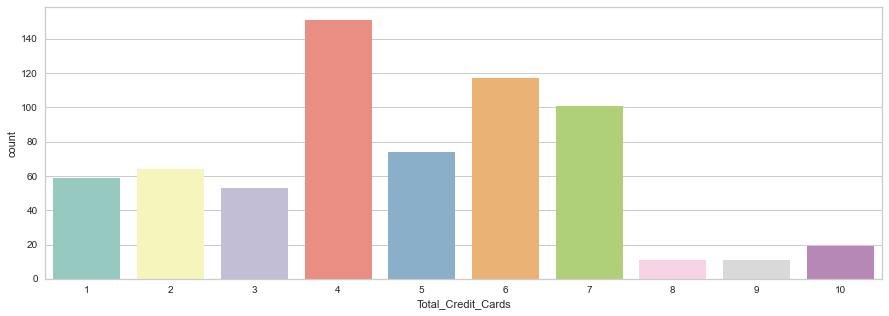

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(bankDataM["Total_Credit_Cards"], palette="Set3")
bankData['Total_Credit_Cards'].value_counts(ascending=False) #Counting number of People living in each Tier

__Observation:__

* We see that many customers have 4 credit cards (About 151 them) 
* The second highest group of customers has 6 credit cards ( About 117 people))
* The third highest group of customers has 7 credit cards (About 101 people)

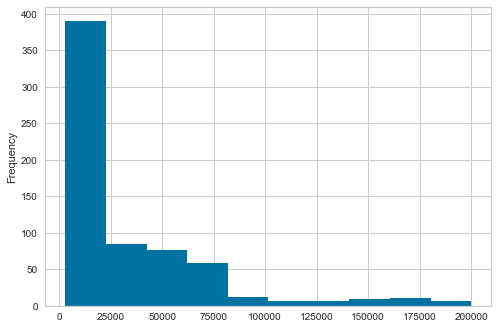

In [10]:
bankDataM.Avg_Credit_Limit.plot(kind="hist")

**Observation**
* We see that most people between 3000 and 23000

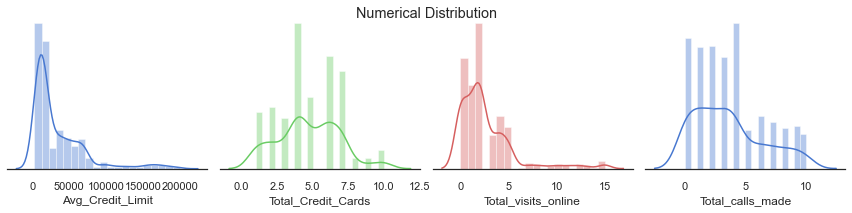

In [11]:
# Features distribution
sns.set(style='white', palette='muted', color_codes=True)
fig, axs = plt.subplots(1, 4, figsize=(12, 3))
sns.despine(left=True)
axs[0] = sns.distplot(bankDataM['Avg_Credit_Limit'], bins=20, ax=axs[0])
axs[1] = sns.distplot(bankDataM['Total_Credit_Cards'], bins=20, ax=axs[1], color='g')
axs[2] = sns.distplot(bankDataM['Total_visits_online'], bins=20, ax=axs[2], color='r')
axs[3] = sns.distplot(bankDataM['Total_calls_made'], bins=20, ax=axs[3], color='b')

fig.suptitle('Numerical Distribution')
plt.setp(axs, yticks=[])
plt.tight_layout()
plt.show()

__Observations:__
* Based on this chart we can see that we will have at least 3 clusters.

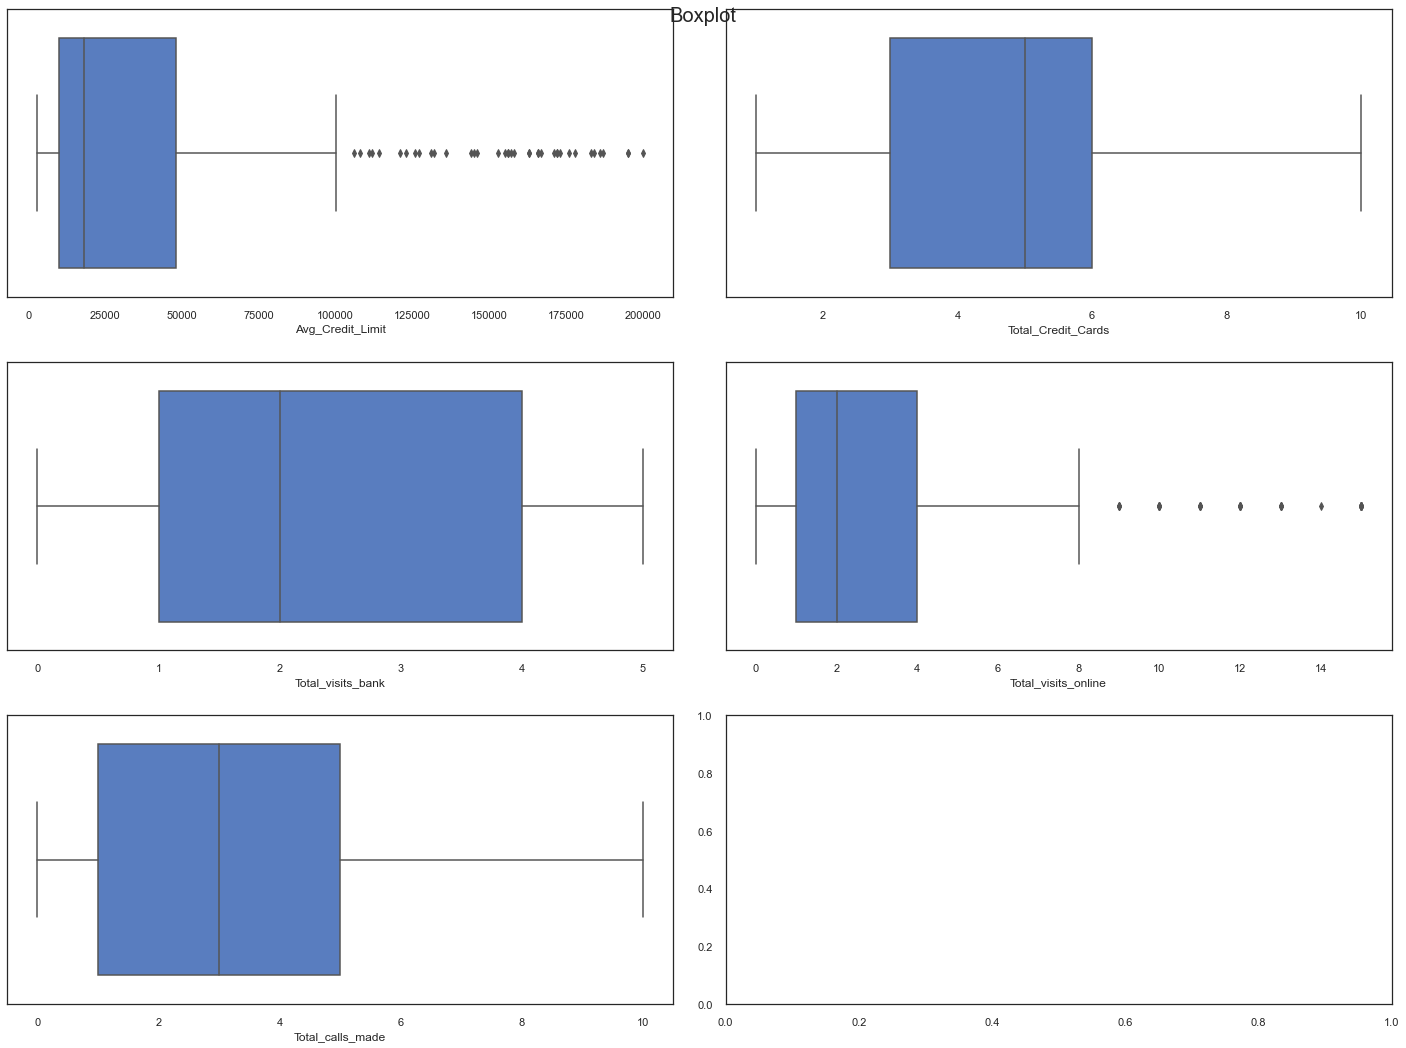

In [12]:
# selecting numerical columns
cols= bankDataM.select_dtypes(include=np.number).columns.tolist()

fig, axes = plt.subplots(3, 2,  figsize=(20, 15))
fig.suptitle('Boxplot', fontsize=20)
i = 0
for ii in range(3):
    sns.boxplot(ax=axes[ii][0],x=bankDataM[cols[i]])
    #counter = counter+1
    i=i+1
    if i != 5:
        sns.boxplot(ax=axes[ii][1],x=bankDataM[cols[i]])
        i=i+1
    else:
        pass

fig.tight_layout(pad=2.0)

__Observation:__
* We can Detect few outliers in Total_visits_online, Avg_Credit_Limit and Total_visits_online

__Bivariate Analysis:__

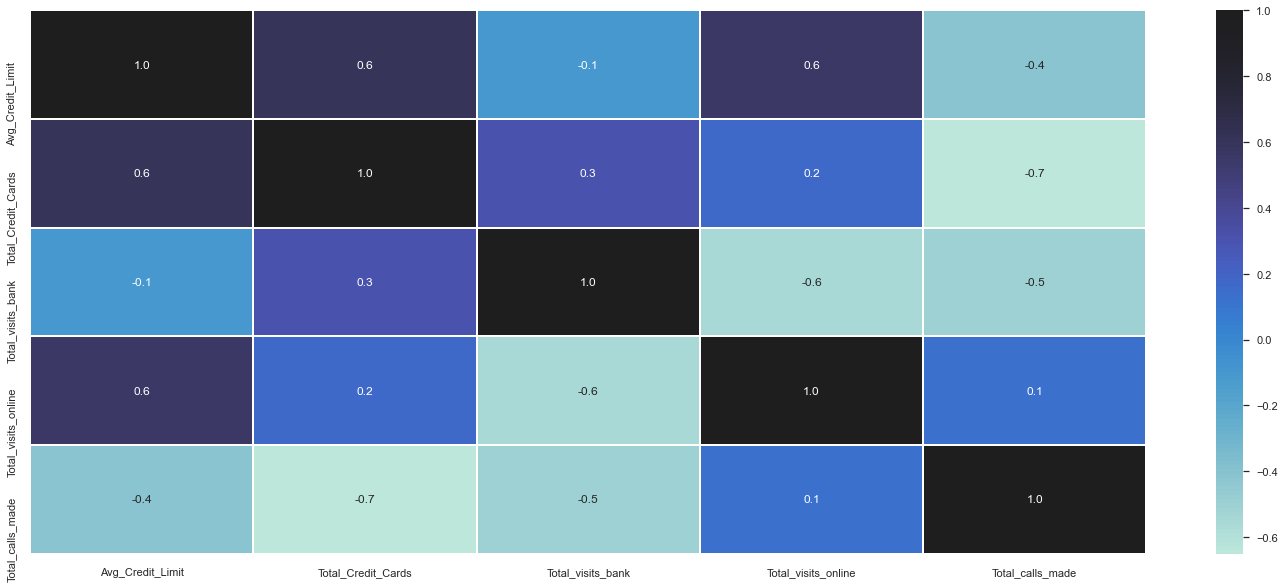

In [13]:
plt.figure(figsize=(25,10))
sns.heatmap(bankDataM.corr(), annot=True, linewidths=1, fmt= '.01f', center = 1 )  # heatmap
plt.show()
#The heatmap below is an example of Multivariate Analysis

__Observation:__

* We can see that Total_Credit_Cards is highly correlated to Avg_Credit_Limit
* We can see that Total_visits_online is highly correlated Avg_Credit_Limit
* We can see that Total_Credit_Cards is negatively correlated to Total_calls_made
* We can see that Total_visits_bank is negatively correlated to Total_calls_made
* We can see that Total_visits_bank is negatively correlated to Total_visits_online

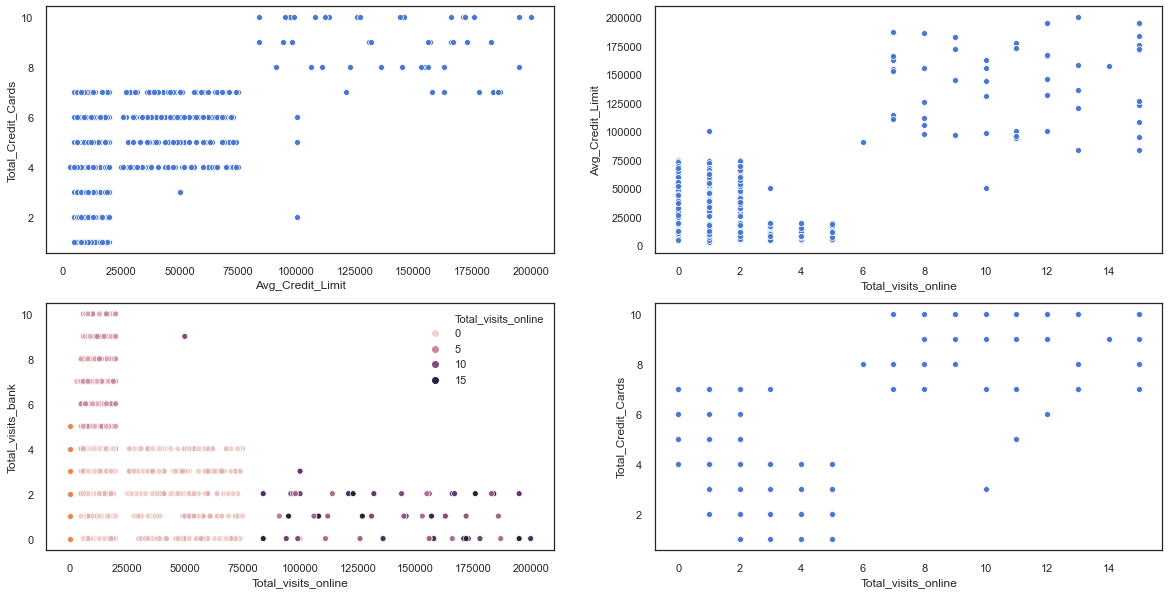

In [14]:
plt.rcParams['figure.figsize'] = (20,10)
plt.subplot(221)
sns.scatterplot(x="Avg_Credit_Limit",y="Total_Credit_Cards",data=bankDataM)

plt.subplot(222)
sns.scatterplot(x="Total_visits_online",y="Avg_Credit_Limit",data=bankDataM)

plt.subplot(223)
sns.scatterplot(x="Avg_Credit_Limit",y="Total_calls_made",data=bankDataM,hue="Total_visits_online")

plt.subplot(224)
sns.scatterplot(x="Total_visits_online",y="Total_Credit_Cards",data=bankDataM)

plt.subplot(223)
sns.scatterplot(x="Total_visits_online",y="Total_visits_bank",data=bankDataM)

__Observations:__
* For Avg_Credit_Limit we see that the Avg Credit Lmit increases as the number to total cards increases
* We see that people with higher credit limits tend to visit the website (go online) more than 6 times although there is a only few of them.
* We see that the higher number of total credit card, the more times the people tend to visit online

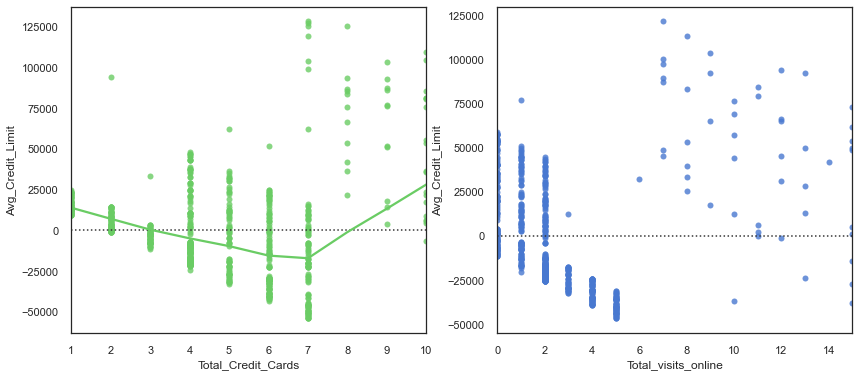

In [15]:
#residplot
plt.rcParams['figure.figsize'] = (14,6)

plt.subplot(121)
sns.residplot(y="Avg_Credit_Limit", x="Total_Credit_Cards",data=bankDataM, lowess=True, color="g")

plt.subplot(122)
sns.residplot(y="Avg_Credit_Limit", x="Total_visits_online",data=bankDataM, lowess=True, color="b")

__Kmeans:__

In [16]:
cols #Columns to be used

['Avg_Credit_Limit',
 'Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made']

In [17]:
# Scaling the dataset
std=StandardScaler()
nData=bankDataM[cols].copy()
scaledData = std.fit_transform(nData)   

In [18]:
# New data Frame and making a copy to be used to Hierachical Clustering
df = pd.DataFrame(scaledData,columns=nData.columns)
df1=df.copy()

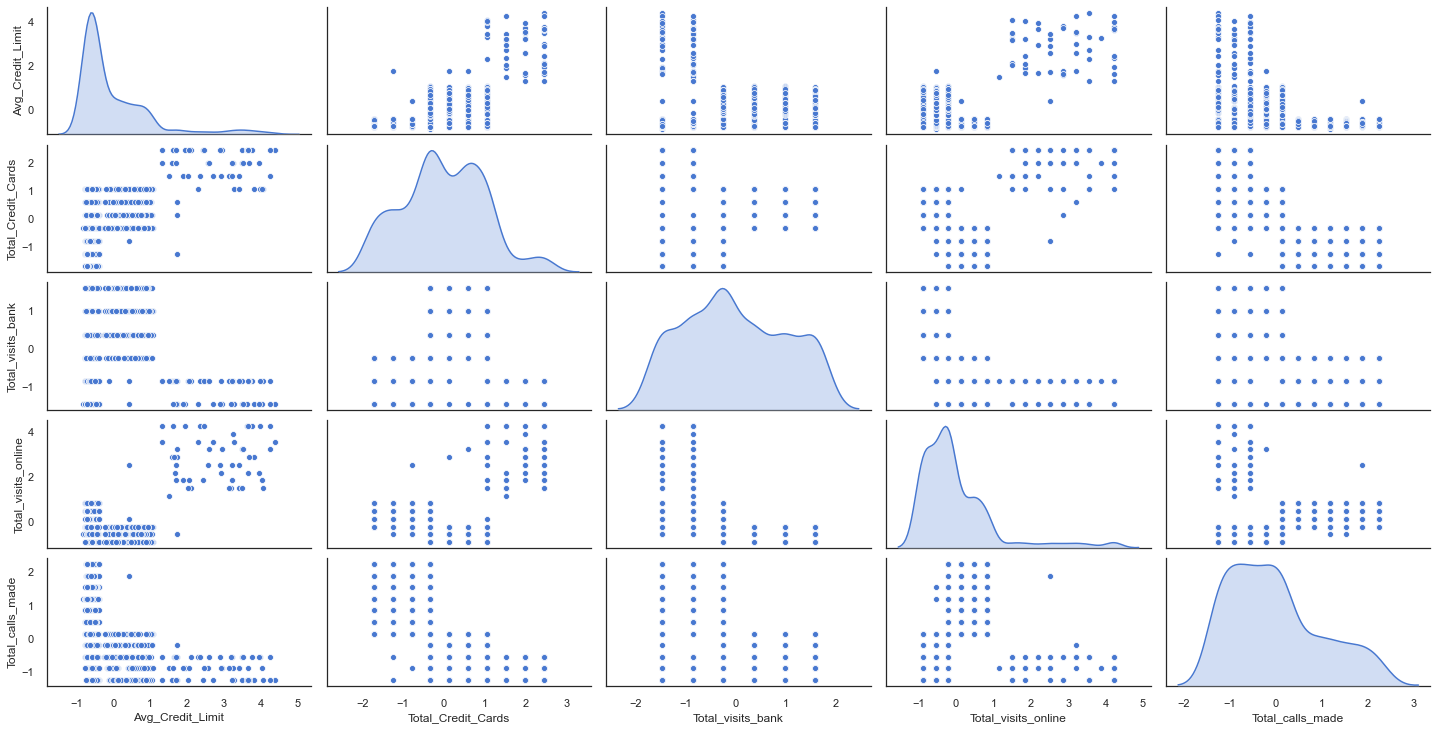

In [19]:
sns.pairplot(df, height=2,aspect=2 , diag_kind='kde')

__Apply K-means:__

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

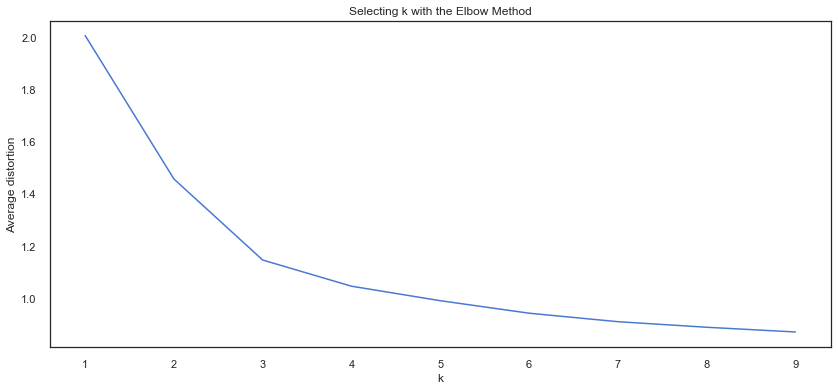

In [20]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df)
    prediction=model.predict(df)
    meanDistortions.append(sum(np.min(cdist(df, model.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])
    
plt.plot(clusters, meanDistortions, 'bx-')    
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


__Observations:__

* We can see a slight bend at 2 and 3. Let's take a closer look

__Finding Fit for K=2:__

In [21]:
KMmodel=KMeans(2)
KMmodel.fit(df)
prediction=KMmodel.predict(df)

#Prediction
bankData["ASSIGNED GROUP"] = prediction
df["ASSIGNED GROUP"] = prediction

#Printing data with Assigned group
bankData.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,ASSIGNED GROUP
0,1,87073,100000,2,1,1,0,1
1,2,38414,50000,3,0,10,9,0
2,3,17341,50000,7,1,3,4,1
3,4,40496,30000,5,1,1,4,1
4,5,47437,100000,6,0,12,3,1


In [22]:
dfClust = bankData.groupby(['ASSIGNED GROUP'])
dfClust.mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
ASSIGNED GROUP,,,,,,,
0,117.857143,55239.830357,12174.107143,2.410714,0.933036,3.553571,6.870536
1,439.747706,55090.896789,46082.568807,5.885321,3.158257,2.119266,1.894495


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd638956310>,
      dtype=object)

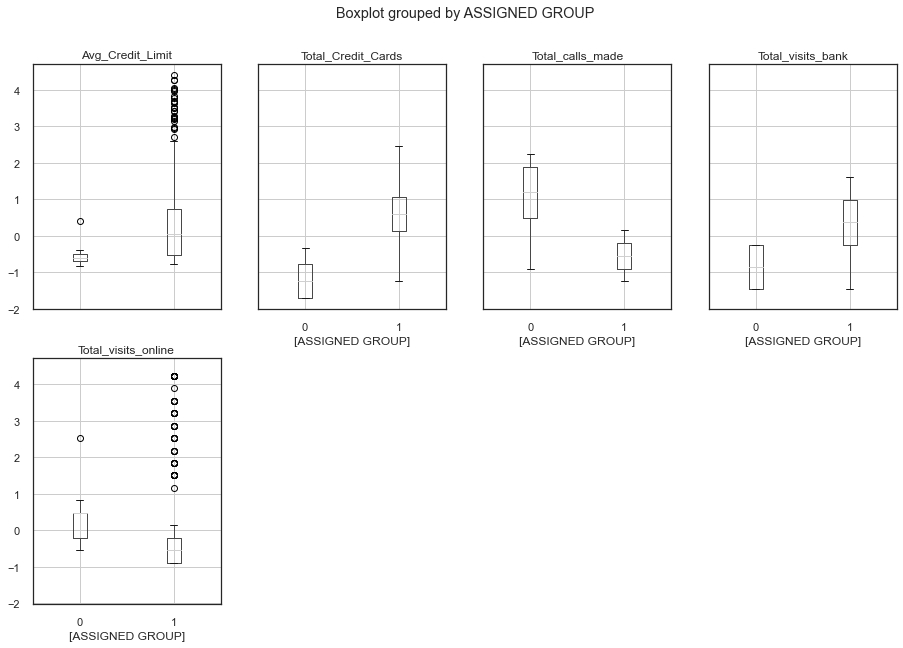

In [23]:
df.boxplot(by='ASSIGNED GROUP', layout = (2,4),figsize=(15,10))

__Observations:__
* We see the Data has been divided into 2 clusters, however, we can see that we have some outliers under Toral_visits_online and Avg_Credit_Limit. Let's check other options for the optimal number of clusters.  

__Finding Fit for K=3:__

In [24]:
KMmodel=KMeans(3)
KMmodel.fit(df)
prediction=KMmodel.predict(df)

#Prediction
bankData["ASSIGNED GROUP"] = prediction
df["ASSIGNED GROUP"] = prediction

#Printing data with Assigned group
bankData.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,ASSIGNED GROUP
0,1,87073,100000,2,1,1,0,2
1,2,38414,50000,3,0,10,9,0
2,3,17341,50000,7,1,3,4,2
3,4,40496,30000,5,1,1,4,2
4,5,47437,100000,6,0,12,3,1


In [25]:
#Displaying Mean for Data Sorted by Assigned group
dfClust = bankData.groupby(['ASSIGNED GROUP'])
dfClust.mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
ASSIGNED GROUP,,,,,,,
0,117.857143,55239.830357,12174.107143,2.410714,0.933036,3.553571,6.870536
1,611.280000,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000
2,417.528497,54881.329016,33782.383420,5.515544,3.489637,0.981865,2.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd63945d910>,
      dtype=object)

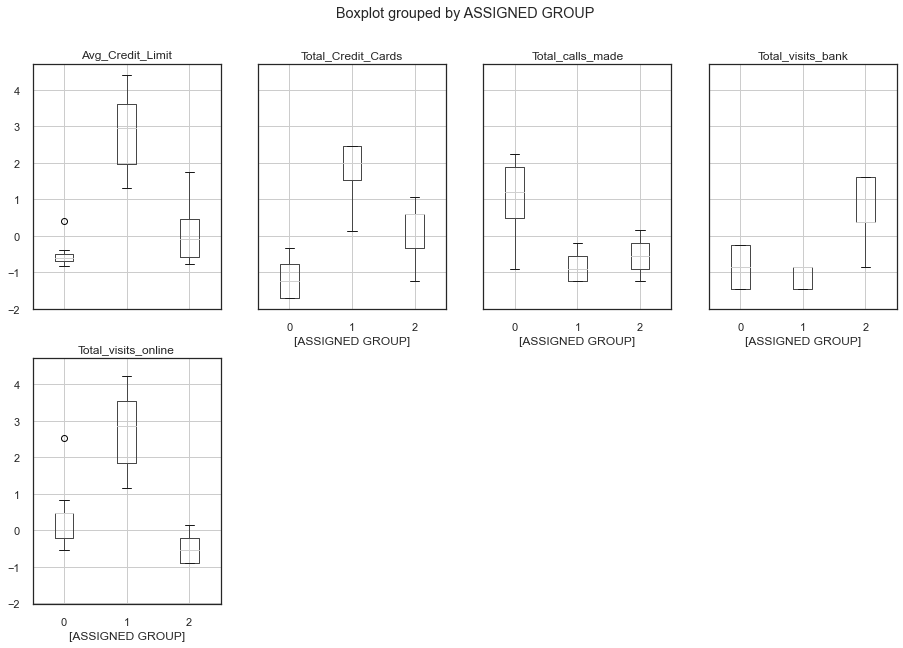

In [26]:
df.boxplot(by='ASSIGNED GROUP', layout = (2,4),figsize=(15,10))

__Observations:__
* We can see 3 differents clusters have been successfully created and the number of outliers has significantly decreased with the 3 clusters. This indicated that K=3 is a better choice.   

__Silhouette Score:__

In [27]:
silh= []
cList = list(range(2,10))
for n_clusters in cList:
    clusterer = KMeans(n_clusters=n_clusters)
    predict = clusterer.fit_predict(df)
    score = silhouette_score(df, predict)
    silh.append(score)
    print("For n_clusters = {}, the silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, the silhouette score is 0.4975565044970062
For n_clusters = 3, the silhouette score is 0.5908634951403026
For n_clusters = 4, the silhouette score is 0.38908899053891927
For n_clusters = 5, the silhouette score is 0.27573387275278877
For n_clusters = 6, the silhouette score is 0.25908683799582527
For n_clusters = 7, the silhouette score is 0.25095214784137204
For n_clusters = 8, the silhouette score is 0.25039694772373444
For n_clusters = 9, the silhouette score is 0.21362171246708714


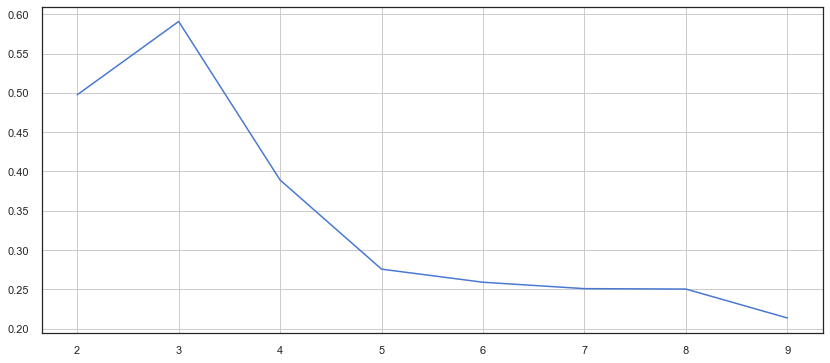

In [28]:
plt.plot(cList,silh)
plt.grid()

__Observations__
* It appears k = 2 and 3 might be a good number for the clusters. Let's check

__Finding optimal no. of clusters with silhouette coefficients:__

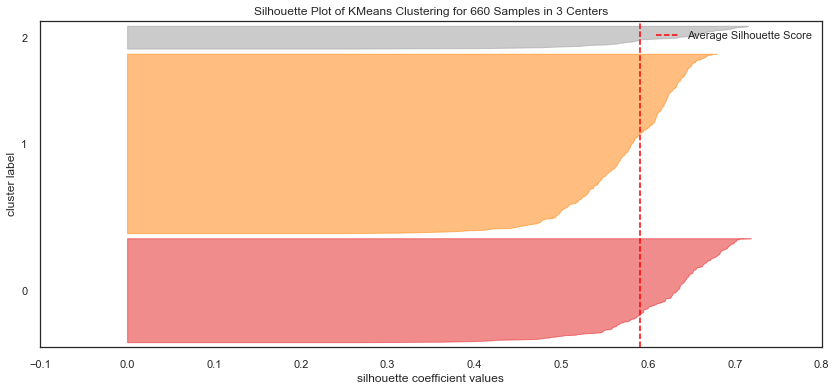

In [29]:
#Finding optimal no. of clusters = 3
avgSilh = SilhouetteVisualizer(KMeans(3, random_state = 1))
avgSilh.fit(df)    
avgSilh.show()

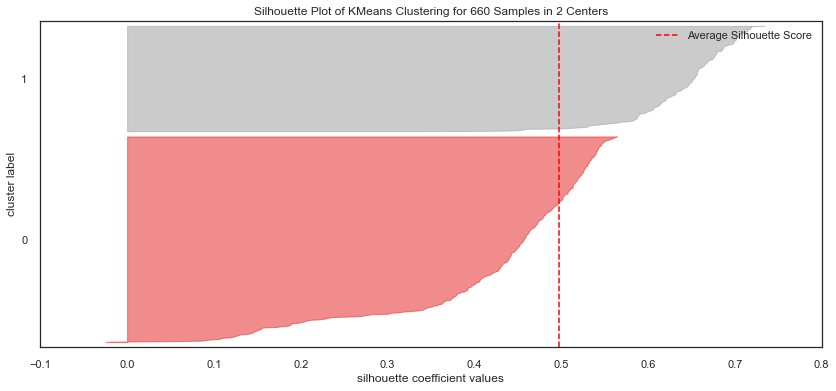

In [30]:
#Finding optimal no. of clusters =2
avgSilh = SilhouetteVisualizer(KMeans(2, random_state = 1))
avgSilh.fit(df)    
avgSilh.show()

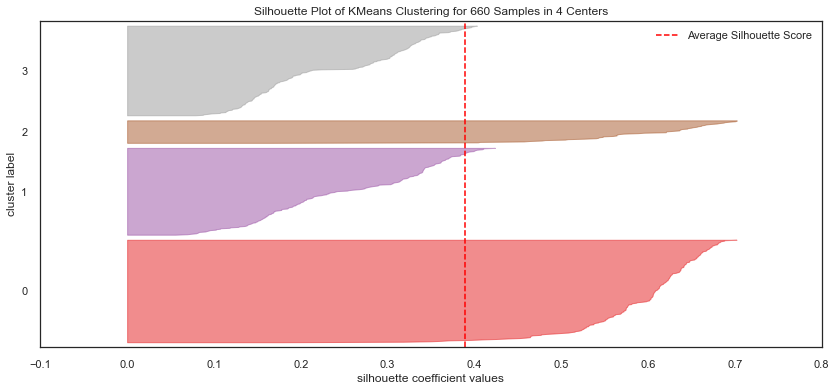

In [31]:
#Finding optimal no. of clusters = 4
avgSilh = SilhouetteVisualizer(KMeans(4, random_state = 1))
avgSilh.fit(df)    
avgSilh.show()

__Choosing 3 as optimal Cluster:__

In [32]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df)

KMeans(n_clusters=3, random_state=0)

In [33]:
df['ASSIGNED GROUP'] = kmeans.labels_

In [34]:
cluster_profile = df.groupby('ASSIGNED GROUP').mean()

In [35]:
cluster_profile['count_in_each_segment'] = df.groupby('ASSIGNED GROUP')['Avg_Credit_Limit'].count().values

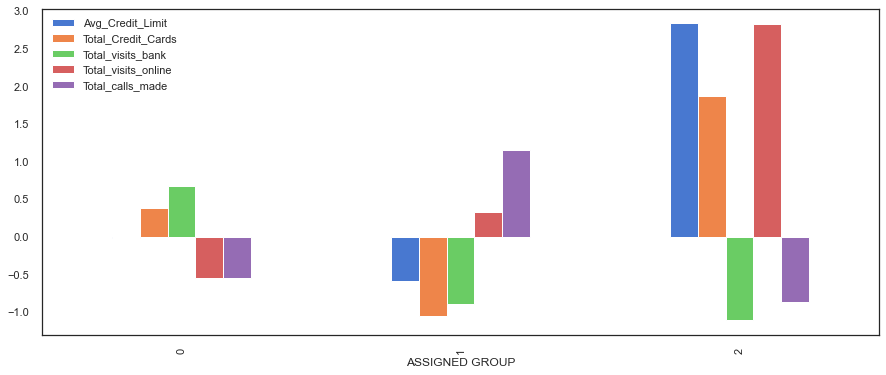

In [36]:
df.groupby('ASSIGNED GROUP').mean().plot.bar(figsize=(15,6))

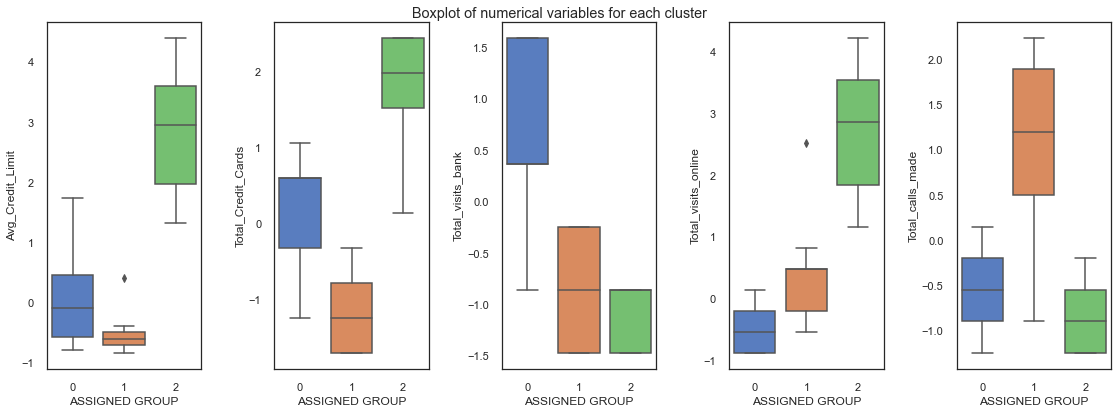

In [37]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster')
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=df[cols[counter]],x=df['ASSIGNED GROUP'])
    counter = counter+1

fig.tight_layout(pad=2.0)

__Observations:__
__For cluster 0:__
* Avg_Credit_Limit is very low to medium in this cluster
* Total_Credit_Cards is also a very low to medium in this cluster
* Total_visits_bank is very low to high in this cluster
* Total_visits_online is mainly between 0 and -1 in this cluster
* Total_calls_made is mainly very low to medium in this cluster

__For cluster 1:__
* Avg_Credit_Limit is very low in this cluster, between -1 and 0
* Total_Credit_Cards is also a very low in this cluster, less than 0
* Total_visits_bank is very low in this cluster, between -1.5 and less than 0
* Total_visits_online is very low in this cluster
* Total_calls_made is mainly very low in this cluster

__For cluster 2:__
* Avg_Credit_Limit is between medium to high in this cluster
* Total_Credit_Cards is medium to high in this cluster
* Total_visits_bank is very low in this cluster
* Total_visits_online is mainly between 1 and 4 in this cluster
* Total_calls_made is mainly very low in this cluster

__Hierarchical Clustering:__

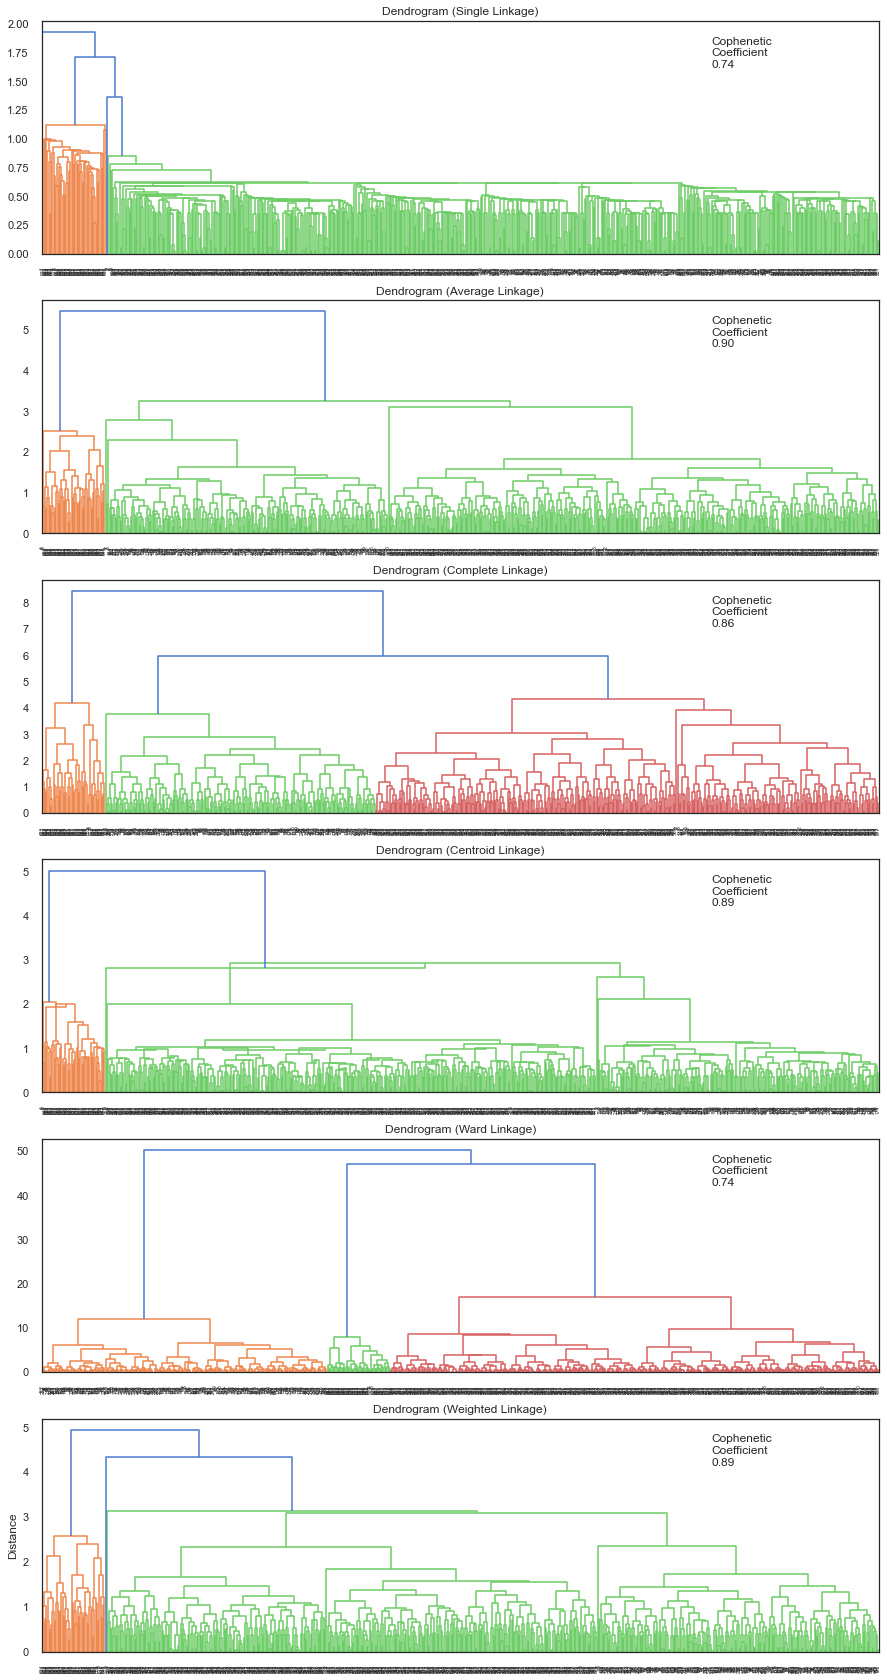

In [38]:
#Methods to be used
methods = ['single',
           'average', 
           'complete',
           'centroid',
           'ward',
          'weighted']

# Create lists to save results of coph calculation
compare_cols = ['Linkage', 'Cophenetic Coefficient']
compare =[]

# Create a subplot image
fig, axs = plt.subplots(len(methods), 1, figsize=(15, 30))

# Get linkage, plot dendrogram, calculate cophenetic coefficient
for i, method in enumerate(methods):
    
    Z = linkage(df1, metric='euclidean', method=method)
    plt.ylabel('Distance')
    dendrogram(Z, ax=axs[i]);
    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')
    coph_corr, coph_dist = cophenet(Z, pdist(df1))
    axs[i].annotate(f'Cophenetic\nCoefficient\n{coph_corr:0.2f}', 
                    (0.80, 0.80),
                    xycoords='axes fraction')

__Observations:__
* We see most of the Cophenetic Coefficient are high which is a sign that we are getting closer to our goal.
* The results from the Cophenetic Coefficient, it shows that the Average Linkage is closer to the data.
* The Ward Linkage seems visually better as it creates more distint clusters.

__Trying with K value as 3:__

In [39]:
AgModel = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
AgModel.fit(df)
#bankDataM['Cluster Labels'] = model.labels_

AgglomerativeClustering(linkage='average', n_clusters=3)

In [40]:
histData['Cluster Labels'] = AgModel.labels_

In [41]:
cluster_profile= histData.groupby('Cluster Labels').mean()

In [42]:
cluster_profile['Count'] = histData.groupby('Cluster Labels')['Avg_Credit_Limit'].count().values

In [43]:
cluster_profile.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Count
Cluster Labels,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,12174.107143,2.410714,0.933036,3.553571,6.870536,224


In [44]:
cols

['Avg_Credit_Limit',
 'Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made']

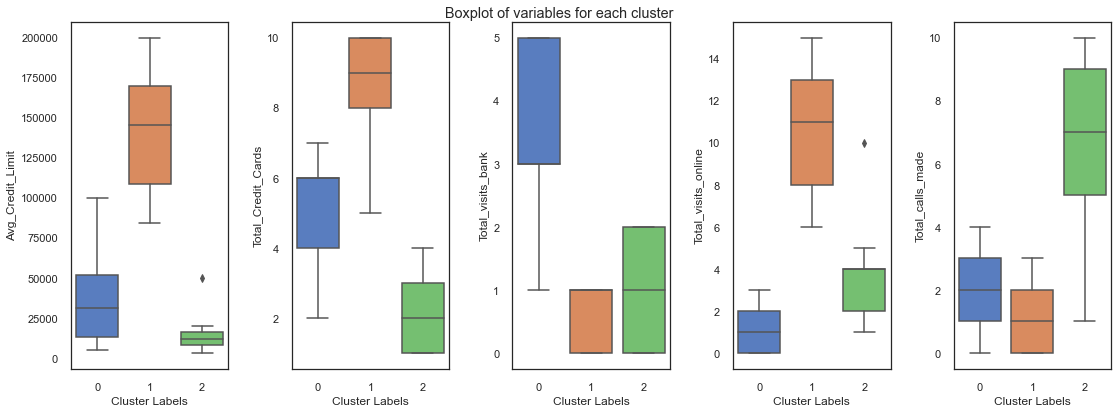

In [45]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of variables for each cluster')
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=histData[cols[counter]],x=histData['Cluster Labels'])
    counter = counter+1

fig.tight_layout(pad=2.0)

__Clusters Comparison:__

__Cluster 0:__
* In this cluster, Avg_Credit_Limit is very low to medium.
* Total_Credit_Cards is a low to medium.
* Total_visits_bank is low to high and between 1 to 5.
* Total_visits_online is very low.
* Total_calls_made is very low, between 0 and 4
* This cluster contains 386 items

__Cluster 1:__
* Avg_Credit_Limit is in the medium to high range in this cluster.
* Total_Credit_Cards is in the medium to high range in this cluster.
* Total_visits_bank is between 0 and 1.
* Total_visits_online is in the medium to high range.
* Total_calls_made is very low, between 0 and 3.
* This cluster contains 50 items

__Cluster 2:__
* Avg_Credit_Limit is in the very low range in this cluster, it is less than 25000, with 1 outlier
* Total_Credit_Cards is a low very low range, less than 4.
* Total_visits_bank is in the low range, between 0 to 2.
* Total_visits_online is very low.
* Total_calls_made is in the very low to very high range, between 1 and 10
* This cluster contains 224 items





__Business Recommendations:__
* From our analysis, we saw that that people in cluster 0 tend to have the second higher number of credit cards,second higher credit limit,and prefer to visit banks instead of calling the bank so we recommend offering a more personalized approach to these member with by offering faster service at the branches and a friendly staff.
* From our analysis, we saw that that people in cluster 1 tend to have the highest amount of credit limit, highest number of credit cards, prefer not to visit banks in person,or call the bank. These people prefer to use the online services so we recommend a more personalized online platform that will suit the needs of these individual members.
* From our analysis, we saw that that people in cluster 2 tend to have low credit limits,low credit cards numbers, low visit to the bank, and low online visit. They however prefer to call the bank. For these members, we recommend having a small team in place 24/7/365 days to offer them a more personalized experience. We can also have the marketing team send offers about increasing credit limit and card numbers.